In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from dotenv import load_dotenv
import os

load_dotenv()

password = os.getenv('PG_PASSWORD')


In [4]:
from sqlalchemy import create_engine

database_name = 'telcom'
table_name= 'xdr_data'

connection_params = { "host": "localhost", "user": "postgres", "password": password,
                    "port": "5432", "database": database_name}

engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")

sql_query = 'SELECT * FROM xdr_data'

df = pd.read_sql(sql_query, con= engine)


In [5]:
df.to_csv('df.csv', index=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

4.1

Handle missing values, replace with median for numerical, replace with mode for categorical

In [7]:
columns_to_fill_median = ['Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                        'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
                        'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
                        '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
                        '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
                        'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
                        'Dur. (ms).1', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B',
                        'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL',
                        'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B',
                        'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
                        'Social Media UL (Bytes)', 'Netflix DL (Bytes)',
                        'Netflix UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
                        'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                        'Total DL (Bytes)', 'Total UL (Bytes)']

column_to_fill_mode = ['Start', 'End', 'Last Location Name', 'Handset Type', 'Handset Manufacturer']

df[columns_to_fill_median] = df[columns_to_fill_median].fillna(df[columns_to_fill_median].median())

df[column_to_fill_mode] = df[column_to_fill_mode].fillna(df[column_to_fill_mode].mode().iloc[0])

cleaned_df = pd.concat([df[columns_to_fill_median], df[column_to_fill_mode]], axis=1)

In [8]:
# cleaned_df.to_csv('cleaned_dataset.csv', index=False)

In [9]:
cleaned_df.isna().sum()

Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)               0
50 Kbps < UL TP < 300 Kbps (%)              0
UL TP > 300 Kbps (%)                        0
HTTP DL (Bytes)                             0
HTTP UL (Bytes)                             0
Activity Duration DL (ms)                   0
Activity Duration UL (ms)         

Aggregate, per customer

In [10]:
aggregated_df = cleaned_df.groupby('MSISDN/Number').agg({'TCP DL Retrans. Vol (Bytes)': 'first',
                                                 'TCP UL Retrans. Vol (Bytes)': 'first',
                                                 'Avg RTT DL (ms)': 'first',
                                                 'Avg RTT UL (ms)': 'first',
                                                 'Avg Bearer TP DL (kbps)': 'first',
                                                 'Avg Bearer TP UL (kbps)': 'first',
                                                 'Handset Type': 'first'  
                                                 }).reset_index()

print(aggregated_df)


        MSISDN/Number  TCP DL Retrans. Vol (Bytes)  \
0        3.360100e+10                     568730.0   
1        3.360100e+10                     568730.0   
2        3.360100e+10                     568730.0   
3        3.360101e+10                       1066.0   
4        3.360101e+10                    9349630.0   
...               ...                          ...   
106851   3.379000e+10                     215044.0   
106852   3.379000e+10                     568730.0   
106853   3.197021e+12                     568730.0   
106854   3.370000e+14                     568730.0   
106855   8.823971e+14                     568730.0   

        TCP UL Retrans. Vol (Bytes)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0                           20949.5             46.0              0.0   
1                           20949.5             30.0              1.0   
2                           20949.5             45.0              5.0   
3                           20949.5             69.0       

Compute & list 10 of the top, bottom and most frequent:
TCP values in the dataset. 
RTT values in the dataset.
Throughput values in the dataset.


In [11]:
top_tcp_values = cleaned_df['TCP DL Retrans. Vol (Bytes)'].nlargest(10)
bottom_tcp_values = cleaned_df['TCP DL Retrans. Vol (Bytes)'].nsmallest(10)
most_frequent_tcp_values = cleaned_df['TCP DL Retrans. Vol (Bytes)'].value_counts().nlargest(10)

top_rtt_values = cleaned_df['Avg RTT DL (ms)'].nlargest(10)
bottom_rtt_values = cleaned_df['Avg RTT DL (ms)'].nsmallest(10)
most_frequent_rtt_values = cleaned_df['Avg RTT DL (ms)'].value_counts().nlargest(10)

top_throughput_values = cleaned_df['Avg Bearer TP DL (kbps)'].nlargest(10)
bottom_throughput_values = cleaned_df['Avg Bearer TP DL (kbps)'].nsmallest(10)
most_frequent_throughput_values = cleaned_df['Avg Bearer TP DL (kbps)'].value_counts().nlargest(10)

print(top_tcp_values)
print(bottom_tcp_values)
print(most_frequent_tcp_values)
print(top_rtt_values)
print(bottom_rtt_values)
print(most_frequent_rtt_values)
print(top_throughput_values)
print(bottom_throughput_values)
print(most_frequent_throughput_values)


77979     4.294426e+09
135678    4.291380e+09
34645     4.289877e+09
140813    4.289488e+09
3782      4.288060e+09
119684    4.275259e+09
39637     4.268432e+09
76990     4.259997e+09
59016     4.256650e+09
41209     4.254644e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
59717     2.0
125094    2.0
2850      4.0
39610     4.0
52488     4.0
60376     4.0
60426     4.0
75093     4.0
100314    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
TCP DL Retrans. Vol (Bytes)
568730.0    88147
1330.0        433
2660.0        219
38.0          200
92.0          192
1318.0        156
543.0         133
3990.0        114
76.0          108
5320.0        102
Name: count, dtype: int64
30166     96923.0
29927     64640.0
17910     55811.0
5989      54847.0
22851     26971.0
23455     26250.0
1373      25873.0
81274     25602.0
97321     25374.0
100584    24733.0
Name: Avg RTT DL (ms), dtype: float64
42612     0.0
52225     0.0
60152     0.0
61152     0.0
61345     0.0
103328  

The average throughput  per handset type & Average TCP retransmission per handset type


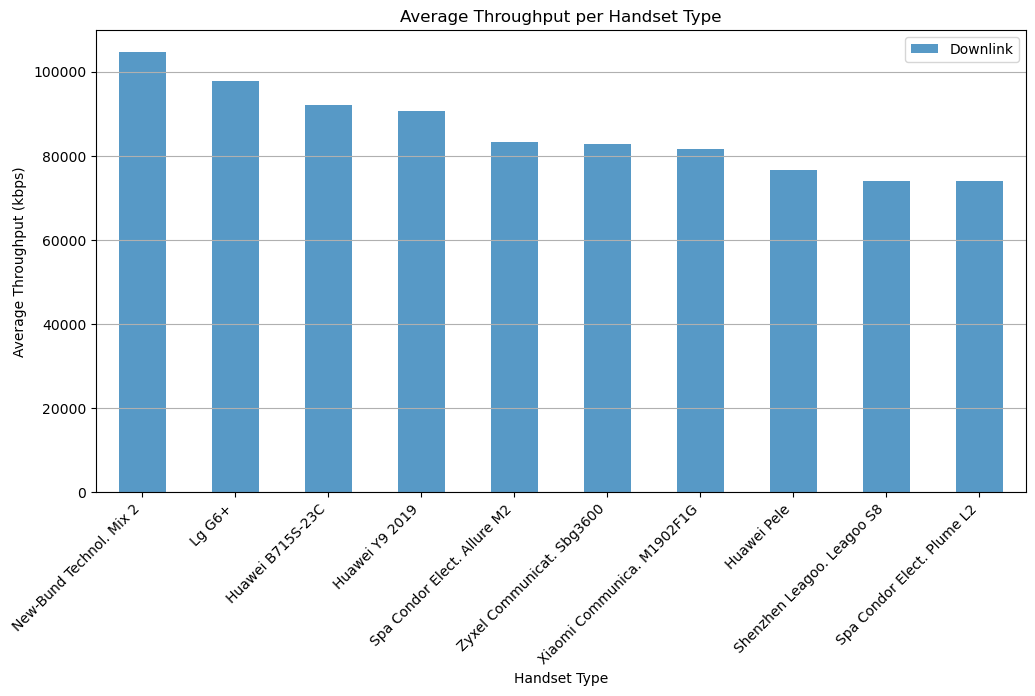

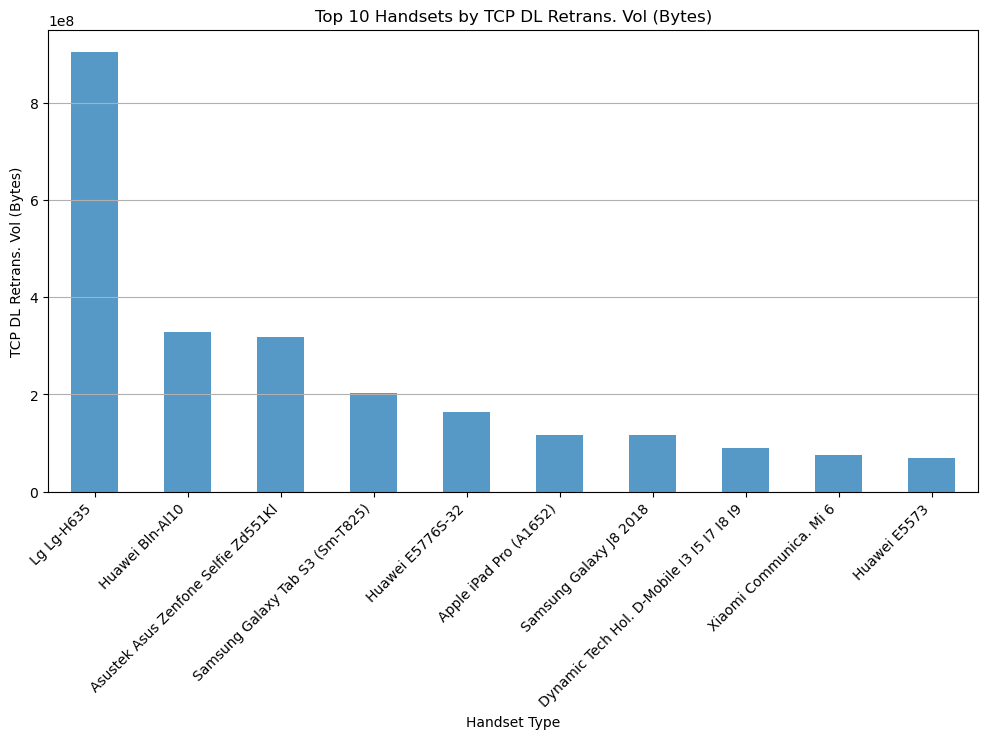

In [16]:
avg_throughput_per_handset = cleaned_df.groupby('Handset Type')[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean()
top_10_handsets = avg_throughput_per_handset['Avg Bearer TP DL (kbps)'].nlargest(10)

plt.figure(figsize=(12, 6))
top_10_handsets.plot(kind='bar', alpha=0.75)
plt.title('Average Throughput per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput (kbps)')
plt.xticks(rotation=45, ha='right')
plt.legend(['Downlink', 'Uplink'])
plt.grid(axis='y')
plt.show()

# Group by 'Handset Type' and calculate the mean of the desired column(s)
avg_tcp_per_handset = cleaned_df.groupby('Handset Type')[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean()

# Calculate the top 10 handsets based on the mean TCP DL Retrans. Vol (Bytes)
top_10_handsets = avg_tcp_per_handset['TCP DL Retrans. Vol (Bytes)'].nlargest(10)

# Plot the top 10 handsets
plt.figure(figsize=(12, 6))
top_10_handsets.plot(kind='bar', alpha=0.75)
plt.title('Top 10 Handsets by TCP DL Retrans. Vol (Bytes)')
plt.xlabel('Handset Type')
plt.ylabel('TCP DL Retrans. Vol (Bytes)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()




A k-means clustering (where k = 3) to segment users into groups of experiences

In [19]:
from sklearn.cluster import KMeans

experience_metrics = cleaned_df[['Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (Bytes)']]

kmeans = KMeans(n_clusters=3, random_state=42)
cleaned_df['Cluster'] = kmeans.fit_predict(experience_metrics)

d:\tenx\user-analytics-week1\.conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
